<a href="https://colab.research.google.com/github/PGV1000/maga_4sem_OiABDvODZZ/blob/main/%D0%9C%D0%B5%D0%B4%D0%B2%D0%B5%D0%B4%D0%B5%D0%B2_%D0%9E%D0%B8%D0%90%D0%91%D0%94%D0%B2%D0%9E%D0%94%D0%97%D0%97_%D0%B7%D0%B0%D1%87%D0%B5%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация изображений, полученных в резултьтате аэрокосмической съемки земной поверхности

#Ссылка на рабочий блокнот: https://clck.ru/3KPTLH

## Постановка задачи классификации изображений

**Задача классификации изображений** - одна из **фундаментальных** в задачах обработки изображений в целом и обработки данных аэрокосмической съемки в частности.

**Целью классификации изображений** является **определение категории объектов** на изображении. В большинстве случаев рассматривается **классификация** изображений **по наиболее значимому объекту** (одно изображение = одна аннотация), однако существуют также и методы, классифицирующие несколько объектов на изображении.

Важно отметить, что в данной задаче рассматриваются **изображения в целом**, а в качестве аннотаций выступают **текстовые значения классов без пространственной привязки** к изображению. При **повышении детальности классификации** изображения получаются задача **классификации объектов** и задача **семантической сегментации** (попиксельной классификации) С другой стороны, при **добавлении пространственной привязки к аннотациям** получается задача **обнаружения объектов** на изображении.

Пример классификации аэрокосмических изображений ([Набор данных UC Merced](http://weegee.vision.ucmerced.edu/datasets/landuse.html)):

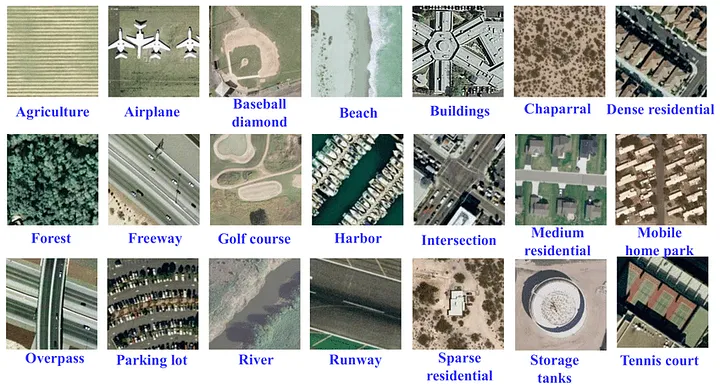

## Применение классификации изображений в задачах обработки данных дистанционного зондирования

Классификацию изображений в задачах обработки данных дистанционного зондирования могут применяться для:

*   классификации земной поверхности;
*   обнаружения объектов на изображении.

Стоит отметить, что практическое применение классификации изображений для этих задач было в значительной степени замещено использованием методов семантической сегментации и обнаружения объектов, соответственно. Тем не менее, классификация всё ещё может использоваться для отбора изображений при подготовке неборов обучающих данных.



## Знакомство с наборами данных для обучения классификации снимков

Традиционная структура набора данных для классификации изображений показана на рисунке ниже:

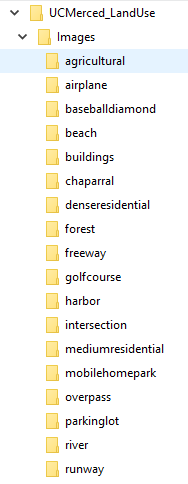

Экземпляры набора (изображения) содержатся в папках, название которых и служит аннотацией экземпляра.


В случаях, когда набор данных разделен на выборки, он выглядит следующим образом:

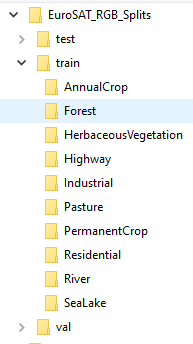

Часто используемые наборы данных дистанционного зондирования, применяющиеся для сравнения моделей классификации изображений:

*   [UC Merced](http://weegee.vision.ucmerced.edu/datasets/landuse.html): 2 100 изображений, 21 класс, по 100 изображений на класс. Размер изображений: 256 на 256 пикселей. Отсутствует разделение на выборки.
*   [EuroSAT](https://github.com/phelber/eurosat): 27 000 изображений, 10 классов, от 2 000 до 3 000 изображений на класс. Существуют RGB и мультиспектральная (6 каналов) варианты набора. Размер изображений: 256 на 256 пикселей. Отсутствует разделение на выборки.
*   [SAT-4](https://www.kaggle.com/datasets/crawford/deepsat-sat4) ([Домашняя страница](https://csc.lsu.edu/~saikat/deepsat/) набора данных больше не позволяет скачать данные): 500 000 изображений, 4 класса, от 90 000 до 180 000 изображений на класс. Размер изображений: 28 на 28 пикселей, 4 канала (RGB + ближний инфракрасный). Существует разделение на обучающую и тестовую выборки.
*   [SAT-6](https://www.kaggle.com/datasets/crawford/deepsat-sat6) ([Домашняя страница](https://csc.lsu.edu/~saikat/deepsat/) набора данных больше не позволяет скачать данные): 405 000 изображений, 6 классов, от 10 000 до 150 000 изображений на класс. Размер изображений: 28 на 28 пикселей, 4 канала (RGB + ближний инфракрасный). Существует разделение на обучающую и тестовую выборки.



# Практический пример классификации изображений

Импорт библиотек

In [15]:
!pip install -U datasets
!pip install fsspec==2023.9.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 16.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; pl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.4/173.4 kB 4.6 MB/s eta 0:00:00
ERROR: Operation cancelled by user
^C


In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import os

if not os.path.exists("./outputs"): os.mkdir("./outputs")

import torch
import torch.nn as nn
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset
from torchsummary import summary

from datasets import load_dataset

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Определение значений гиперпараметров обучения

В зависимости от применяемой модели машинного обучения, появляется необходимость определить значения ряда гиперпараметров модели, влияющих на качество и скорость обучения системы искусственного интеллекта. В отличие от параметров модели, которые оптимизируются системой в процессе обучения, оптимизация гиперпараметров в процессе обучения невозможна или не имеет смысла.

In [2]:
USE_CUDA = torch.cuda.is_available()
print(USE_CUDA)
RESIZED_IMAGE_DIMENSIONS = 96
DROPOUT_CHANCE = 0.5
LEARNING_RATE = 0.005
GAMMA = 0.9
STEP_SIZE = 10
MOMENTUM = 0.9
WEIGHT_DECAY = 0.001
BATCH_SIZE = 64
NUM_EPOCHS = 30


True


## Импорт набора данных

In [3]:
dataset = load_dataset("cm93/eurosat", download_mode="force_redownload")
print(dataset)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/1.69k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/73.6M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/9.13M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/9.20M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/21600 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2700 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2700 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 21600
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 2700
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 2700
    })
})


##Подготовка обучающей, тестовой выборок

In [4]:
splitdataset = dataset#["train"].train_test_split(test_size=0.2).with_format("torch")
print(splitdataset)

train_dataset, test_dataset = splitdataset["train"], splitdataset['test']

print(train_dataset)

data_transforms = transforms.Compose([
    transforms.Resize((RESIZED_IMAGE_DIMENSIONS, RESIZED_IMAGE_DIMENSIONS)),
    transforms.ToTensor()
])

def preprocess(sample_dataset):
  sample_dataset["image"] = [data_transforms(image.convert("RGB")) for image in sample_dataset["image"]]
  return sample_dataset

train_dataset.set_transform(preprocess)
test_dataset.set_transform(preprocess)

#print(train_dataset[14]['image'])

train_dl = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dl = DataLoader(test_dataset, batch_size=32, shuffle=True)

class_names = train_dataset.features['label'].names
class_indices = train_dataset.features['label'].str2int(class_names)

print(class_names)
print(class_indices)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 21600
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 2700
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 2700
    })
})
Dataset({
    features: ['image', 'label'],
    num_rows: 21600
})
['Forest', 'River', 'Highway', 'AnnualCrop', 'SeaLake', 'HerbaceousVegetation', 'Industrial', 'Residential', 'PermanentCrop', 'Pasture']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Отображение случайного изображения из обучающей выборки

Аннотация изображения:  River


<ipython-input-5-3ff3c52d2bb5>:3: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3725.)
  random_image = train_dataset[random_image_index]['image'].T


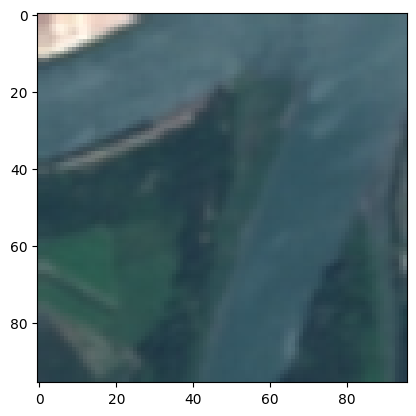

In [5]:
random_image_index = random.randrange(len(train_dataset)-1)

random_image = train_dataset[random_image_index]['image'].T
print("Аннотация изображения: ", class_names[train_dataset[random_image_index]["label"]])
plt.imshow(random_image)

Создание класса модели

In [17]:
import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        self.act = nn.ReLU(inplace=True)

        self.conv_block1 = nn.Sequential(
            nn.Conv2d(3, 12, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(12),
            self.act,
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.conv_block2 = nn.Sequential(
            nn.Conv2d(12, 24, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(24),
            self.act,
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.conv_block3 = nn.Sequential(
            nn.Conv2d(24, 48, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(48),
            self.act,
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Assuming RESIZED_IMAGE_DIMENSIONS=64 for EuroSAT
        flattened_dim = int((RESIZED_IMAGE_DIMENSIONS / 8) ** 2 * 48)

        self.dense1 = nn.Linear(flattened_dim, 128)
        self.drop = nn.Dropout(p=DROPOUT_CHANCE)
        self.dense2 = nn.Linear(128, len(class_names))

    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.conv_block3(x)

        x = x.view(x.size(0), -1)
        x = self.act(self.dense1(x))
        x = self.drop(x)
        x = self.dense2(x)
        return x

In [16]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.relu = nn.ReLU(inplace=True)

        self.cnn1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            self.relu,
            nn.MaxPool2d(2)
        )

        self.cnn2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            self.relu,
            nn.MaxPool2d(2)
        )

        self.cnn3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            self.relu,
            nn.MaxPool2d(2)
        )

        flattened_size = int((RESIZED_IMAGE_DIMENSIONS / 8) ** 2 * 64)

        self.fc1 = nn.Linear(flattened_size, 64)
        self.dropout = nn.Dropout(p=DROPOUT_CHANCE)
        self.fc2 = nn.Linear(64, len(class_names))

    def forward(self, x):
        out = self.cnn1(x)
        out = self.cnn2(out)
        out = self.cnn3(out)

        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out


In [18]:
device = torch.device('cuda' if USE_CUDA else "cpu")

summary(CNN().to(device), input_size= (3, RESIZED_IMAGE_DIMENSIONS, RESIZED_IMAGE_DIMENSIONS))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 96, 96]             448
       BatchNorm2d-2           [-1, 16, 96, 96]              32
              ReLU-3           [-1, 16, 96, 96]               0
              ReLU-4           [-1, 16, 96, 96]               0
              ReLU-5           [-1, 16, 96, 96]               0
              ReLU-6           [-1, 16, 96, 96]               0
         MaxPool2d-7           [-1, 16, 48, 48]               0
            Conv2d-8           [-1, 32, 48, 48]           4,640
       BatchNorm2d-9           [-1, 32, 48, 48]              64
             ReLU-10           [-1, 32, 48, 48]               0
             ReLU-11           [-1, 32, 48, 48]               0
             ReLU-12           [-1, 32, 48, 48]               0
             ReLU-13           [-1, 32, 48, 48]               0
        MaxPool2d-14           [-1, 32,

Инициализация модели, критерия вычисления функции потерь, оптимизатора и планировщика

In [19]:
model = CNN()
if USE_CUDA:
  model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM, weight_decay=WEIGHT_DECAY)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=STEP_SIZE, gamma=GAMMA)

Обучение и тестирование модели

In [20]:
train_loss = []
train_accuracy = []
test_accuracy = []
test_loss = []

best_accuracy = 0
best_cm = []

for epoch in range(1, NUM_EPOCHS+1):
  print(f'Эпоха {epoch} из {NUM_EPOCHS}')

  # ---- Обучение ----
  iter_loss = 0.0
  correct = 0
  iterations = 0
  model.train()

  for i in train_dl:
    inputs = i['image']
    labels = i['label']

    #print(labels)


    if USE_CUDA:
      inputs = inputs.cuda()
      labels = labels.cuda()

    outputs = model(inputs)
    #print(outputs)
    loss = criterion(outputs, labels)
    iter_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, predicted = torch.max(outputs, 1)
    correct += (predicted == labels).sum()

    iterations +=1

  scheduler.step()

  train_loss.append(iter_loss / iterations)
  train_accuracy.append((100 * correct / len(train_dataset)))

  print(f'Результаты обучения в {epoch} эпохе:')
  print(f'Значение функции потерь = {train_loss[-1]} | Точность = {train_accuracy[-1]}')

  # ---- Оценка точности ----

  true_labels = []
  predictions = []

  testing_loss = 0.0
  correct = 0
  iterations = 0

  model.eval()

  for i in test_dl:
    inputs = i['image']
    labels = i['label']

    if USE_CUDA:
      inputs = inputs.cuda()
      labels = labels.cuda()

    outputs = model(inputs)
    loss = criterion(outputs, labels)
    testing_loss += loss.item()

    _, predicted = torch.max(outputs, 1)
    correct += (predicted == labels).sum()

    true_labels = [*true_labels, *labels.cpu()]
    predictions = [*predictions, *predicted.cpu()]

    iterations +=1

  test_loss.append(testing_loss / iterations)
  test_accuracy.append((100 * correct / len(test_dataset)))
  cm = confusion_matrix(true_labels, predictions)

  print(f'Результаты тестирования в {epoch} эпохе:')
  print(f'Значение функции потерь = {test_loss[-1]} | Точность = {test_accuracy[-1]}')

  if test_accuracy[-1] > best_accuracy:
    best_accuracy = test_accuracy[-1]
    best_cm = cm
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': test_loss
    }, 'best_model.pt')





Эпоха 1 из 30
Результаты обучения в 1 эпохе:
Значение функции потерь = 1.350901527316482 | Точность = 52.75
Результаты тестирования в 1 эпохе:
Значение функции потерь = 1.2613096650908975 | Точность = 54.0
Эпоха 2 из 30
Результаты обучения в 2 эпохе:
Значение функции потерь = 0.8939199056890276 | Точность = 68.35648345947266
Результаты тестирования в 2 эпохе:
Значение функции потерь = 0.8111493517370785 | Точность = 70.81481170654297
Эпоха 3 из 30
Результаты обучения в 3 эпохе:
Значение функции потерь = 0.7153724562680279 | Точность = 75.06481170654297
Результаты тестирования в 3 эпохе:
Значение функции потерь = 0.6648767702719744 | Точность = 76.0
Эпоха 4 из 30
Результаты обучения в 4 эпохе:
Значение функции потерь = 0.5923441075174897 | Точность = 80.04166412353516
Результаты тестирования в 4 эпохе:
Значение функции потерь = 0.6306877921609317 | Точность = 77.62963104248047
Эпоха 5 из 30
Результаты обучения в 5 эпохе:
Значение функции потерь = 0.507435908626627 | Точность = 82.555557

15 эпоха 88

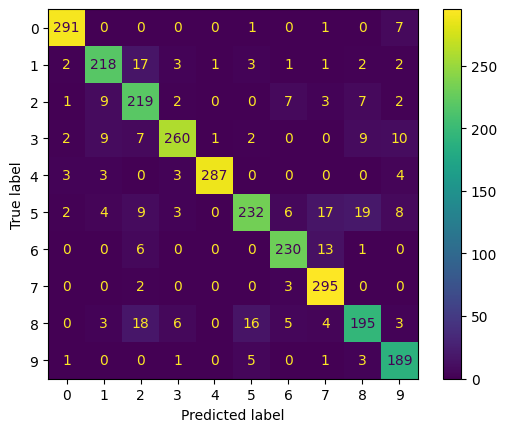

In [21]:
ConfusionMatrixDisplay(best_cm).plot()

Визуализация процесса обучения

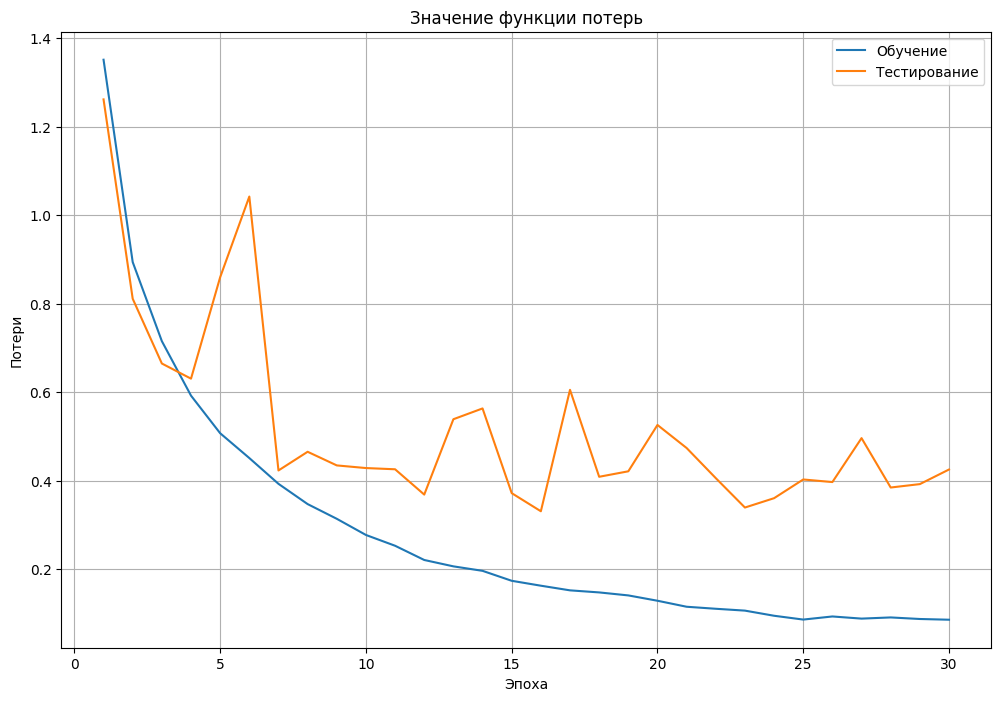

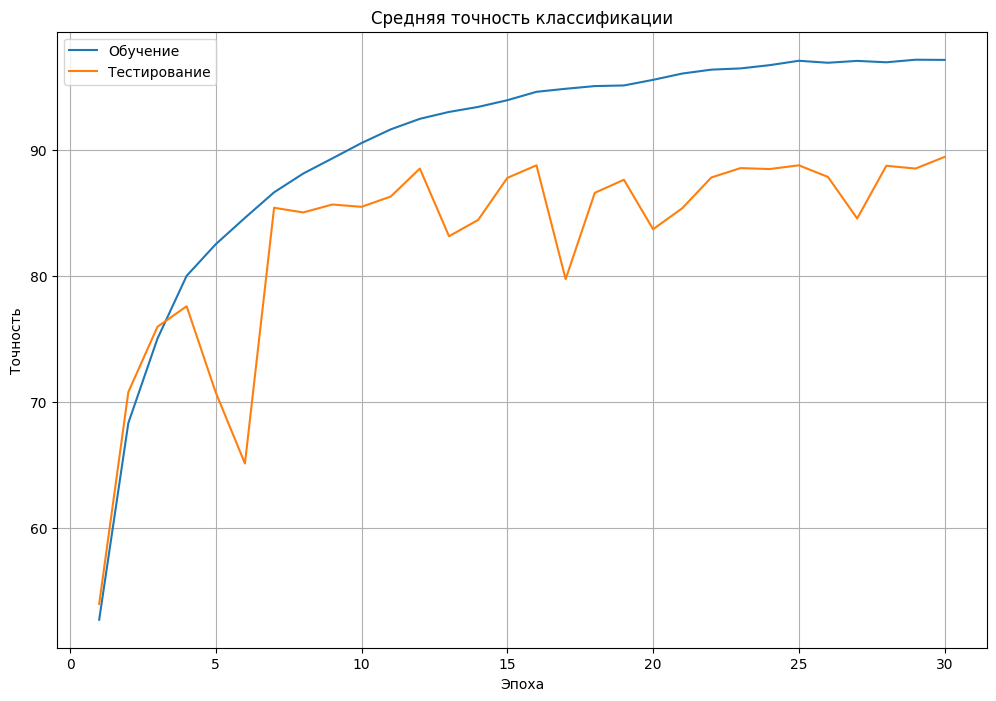

In [22]:
epochs = range(1, NUM_EPOCHS+1)

plt.figure(figsize=(12, 8), num=1)
plt.clf()
plt.plot(epochs, train_loss, label='Обучение')
plt.plot(epochs, test_loss, label='Тестирование')
plt.legend()
plt.grid()
plt.title('Значение функции потерь')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.savefig('outputs/01-loss.pdf')

plt.figure(figsize=(12, 8), num=2)
plt.clf()
plt.plot(epochs, torch.stack(train_accuracy).cpu(), label='Обучение')
plt.plot(epochs, torch.stack(test_accuracy).cpu(), label='Тестирование')
plt.legend()
plt.grid()
plt.title('Средняя точность классификации')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.savefig('outputs/02-accuracy.pdf')